<a href="https://colab.research.google.com/github/Noobs-in-Devhack/AI---ML-/blob/main/9%20-%20Naive_Bayes_Credit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Step 1. Import Library & Read Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
credit_df = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/credit_train.csv")
credit_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


#### Step 2. is there any Missing Values?

In [ ]:
credit_df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [ ]:
credit_df.isnull().sum() / credit_df.shape[0] * 100

Loan ID                          0.000
Customer ID                      0.000
Loan Status                      0.000
Current Loan Amount              0.000
Term                             0.000
Credit Score                    19.154
Annual Income                   19.154
Years in current job             4.222
Home Ownership                   0.000
Purpose                          0.000
Monthly Debt                     0.000
Years of Credit History          0.000
Months since last delinquent    53.141
Number of Open Accounts          0.000
Number of Credit Problems        0.000
Current Credit Balance           0.000
Maximum Open Credit              0.002
Bankruptcies                     0.204
Tax Liens                        0.010
dtype: float64

In [ ]:
credit_df.shape

(100000, 19)

In [ ]:
credit_df['Months since last delinquent'].replace(np.nan, 0, inplace = True)

In [ ]:
credit_df['Credit Score'].unique()

array([ 709.,   nan,  741.,  721., 7290.,  730.,  678.,  739.,  728.,
        740.,  743.,  727.,  723.,  747.,  687.,  750.,  714.,  724.,
        704.,  688.,  749.,  746.,  737.,  729.,  733.,  725.,  745.,
        720.,  718.,  682., 7120.,  680.,  710.,  598.,  719., 6610.,
        652.,  736., 7380.,  644.,  672., 7370.,  699.,  751.,  694.,
        675.,  657.,  748.,  666.,  734.,  742.,  705.,  731., 6240.,
        712.,  685.,  717.,  722.,  618.,  676.,  692., 7210.,  732.,
        649.,  695.,  744.,  686.,  637.,  697.,  706.,  715.,  707.,
        726.,  738., 7500.,  716., 7020.,  651.,  708.,  698.,  689.,
        735.,  703.,  693., 7080.,  645.,  691.,  673.,  700., 7140.,
        658.,  674.,  654., 7490.,  681.,  696.,  713.,  668., 7360.,
        659., 7160.,  647.,  683.,  670.,  623.,  711.,  639.,  671.,
       6990.,  614.,  667.,  701., 7410., 7310., 7040., 7060.,  615.,
       7200.,  656.,  653.,  664.,  613., 7450., 7300.,  636.,  702.,
       7430.,  594.,

In [ ]:
credit_df[credit_df['Credit Score'] > 900]['Credit Score'] / 10

5        729.0
43       712.0
51       661.0
56       738.0
65       737.0
         ...  
99851    742.0
99872    707.0
99906    688.0
99944    679.0
99947    694.0
Name: Credit Score, Length: 4551, dtype: float64

In [ ]:
highscore_index = credit_df[credit_df['Credit Score'] > 900].index

In [ ]:
credit_df.loc[highscore_index, 'Credit Score'] = credit_df[credit_df['Credit Score'] > 900]['Credit Score'] / 10

In [ ]:
credit_df['Credit Score'].unique()

array([709.,  nan, 741., 721., 729., 730., 678., 739., 728., 740., 743.,
       727., 723., 747., 687., 750., 714., 724., 704., 688., 749., 746.,
       737., 733., 725., 745., 720., 718., 682., 712., 680., 710., 598.,
       719., 661., 652., 736., 738., 644., 672., 699., 751., 694., 675.,
       657., 748., 666., 734., 742., 705., 731., 624., 685., 717., 722.,
       618., 676., 692., 732., 649., 695., 744., 686., 637., 697., 706.,
       715., 707., 726., 716., 702., 651., 708., 698., 689., 735., 703.,
       693., 645., 691., 673., 700., 658., 674., 654., 681., 696., 713.,
       668., 659., 647., 683., 670., 623., 711., 639., 671., 614., 667.,
       701., 615., 656., 653., 664., 613., 636., 594., 646., 669., 612.,
       690., 641., 665., 677., 684., 655., 630., 663., 638., 596., 660.,
       679., 609., 603., 643., 633., 586., 629., 648., 640., 625., 635.,
       662., 627., 611., 604., 642., 621., 632., 602., 616., 600., 650.,
       597., 622., 610., 619., 628., 599., 606., 60

In [ ]:
np.round(credit_df['Credit Score'].mean())

716.0

In [ ]:
# replace missing value by mean value
credit_df['Credit Score'].fillna(np.round(credit_df['Credit Score'].mean()), inplace = True)

In [ ]:
# replace missing value by mean value
credit_df['Annual Income'].fillna(np.round(credit_df['Annual Income'].mean()), inplace = True)

In [ ]:
# Drop missing value
credit_df.dropna(inplace = True)

#### Step 3: Data Pre-Processing

In [ ]:
credit_df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [ ]:
credit_df['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', '6 years'],
      dtype=object)

In [ ]:
credit_df['Years in current job'] = credit_df['Years in current job'].str.replace(' years','')

In [ ]:
credit_df['Years in current job'].replace('10+', 10, inplace=True)
credit_df['Years in current job'].replace('< 1 year', 0.5, inplace=True)
credit_df['Years in current job'].replace('1 year', 1, inplace=True)

In [ ]:
credit_df['Years in current job'] = credit_df['Years in current job'].astype('int')

### Step 4. Label Encoder
    * Convert Categorical into Numerical Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
credit_df['Loan Status'] = le_encoder.fit_transform(credit_df['Loan Status'])

In [ ]:
le_encoder = LabelEncoder()
credit_df['Home Ownership'] = le_encoder.fit_transform(credit_df['Home Ownership'])

In [ ]:
le_encoder = LabelEncoder()
credit_df['Term'] = le_encoder.fit_transform(credit_df['Term'])

In [ ]:
le_encoder = LabelEncoder()
credit_df['Purpose'] = le_encoder.fit_transform(credit_df['Purpose'])

In [ ]:
credit_df.drop(['Loan ID', 'Customer ID'], axis = 1, inplace = True)

In [ ]:
credit_df['Bankruptcies'].value_counts()

Bankruptcies
0.0    85430
1.0     9641
2.0      384
3.0       87
4.0       20
5.0        7
6.0        2
7.0        1
Name: count, dtype: int64

In [ ]:
credit_df[credit_df['Bankruptcies'] > 1.0]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
180,1,234806,0,689.0,866799.0,9,1,3,3676.69,14.1,7.0,4,2,86051,167750.0,2.0,0.0
369,1,33154,1,713.0,572793.0,10,3,14,13412.86,11.8,0.0,10,2,49153,178948.0,2.0,0.0
777,1,172436,1,740.0,1340222.0,7,2,3,14965.92,19.8,0.0,6,7,178410,398816.0,3.0,4.0
948,0,298760,1,716.0,1378277.0,10,3,3,11952.14,17.3,63.0,9,6,191786,329494.0,5.0,0.0
967,1,99999999,0,689.0,866799.0,9,1,3,3676.69,14.1,7.0,4,2,86051,167750.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99241,1,322454,0,720.0,1578026.0,1,3,3,14333.60,15.1,0.0,9,2,287299,729498.0,2.0,0.0
99493,1,110506,1,716.0,1378277.0,3,1,3,14315.55,17.9,57.0,7,2,69160,161436.0,2.0,0.0
99629,1,99999999,1,725.0,1133616.0,10,1,3,21633.21,14.9,23.0,16,4,96767,213004.0,2.0,2.0
99894,0,403898,0,689.0,874532.0,3,2,3,20697.27,12.7,74.0,9,2,156978,288090.0,2.0,0.0


In [ ]:
credit_df.loc[credit_df[credit_df['Bankruptcies'] > 1.0].index, 'Bankruptcies'] = 1.0

In [ ]:
credit_df['Bankruptcies'].value_counts()

Bankruptcies
0.0    85430
1.0    10142
Name: count, dtype: int64

#### Features & Target

In [ ]:
X = credit_df.drop(['Bankruptcies'], axis = 1)
Y = credit_df['Bankruptcies']

#### Split into Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

#### Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [ ]:
bern_NB = BernoulliNB()
bern_NB.fit(x_train, y_train)

BernoulliNB()

In [ ]:
bern_NB.score(x_test, y_test)

0.9707036358880461

#### Classification Metrics

In [ ]:
yhat = bern_NB.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, yhat)

array([[16518,   557],
       [    3,  2037]])

<Axes: >

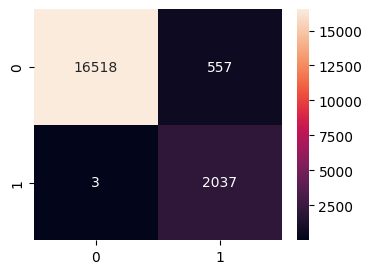

In [ ]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, yhat), annot = True, fmt = '0.0f')

In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     17075
         1.0       0.79      1.00      0.88      2040

    accuracy                           0.97     19115
   macro avg       0.89      0.98      0.93     19115
weighted avg       0.98      0.97      0.97     19115

